# 檢視與處理 Outliers
### 為何會有 outliers, 常見的 outlier 原因
* 未知值，隨意填補 (約定俗成的代入)，如年齡常見 0,999
* 可能的錯誤紀錄/手誤/系統性錯誤，如某本書在某筆訂單的銷售量 = 1000 本

# [作業目標]
- 依照下列提示與引導, 以幾種不同的方式, 檢視可能的離群值

# [作業重點]
- 從原始資料篩選可能的欄位, 看看那些欄位可能有離群值 (In[3], Out[3])
- 繪製目標值累積密度函數(ECDF)的圖形, 和常態分布的累積密度函數對比, 以確認是否有離群值的情形 (In[6], Out[6], In[7], Out[7])

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# 設定 data_path
dir_data = './data'

In [36]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train

Path of read in data: ./data\application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 請參考 HomeCredit_columns_description.csv 的欄位說明，觀察並列出三個你覺得可能有 outlier 的欄位並解釋可能的原因

In [6]:
# 先篩選數值型的欄位
"""
YOUR CODE HERE, fill correct data types (for example str, float, int, ...)
"""
dtype_select = [np.dtype('float64')]

numeric_columns = list(app_train.columns[list(app_train.dtypes.isin(dtype_select))])

numeric_columns


['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_REGISTRATION',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_M

Numbers of remain columns:  65
AMT_INCOME_TOTAL  範圍 ：  25650.0 - 117000000.0


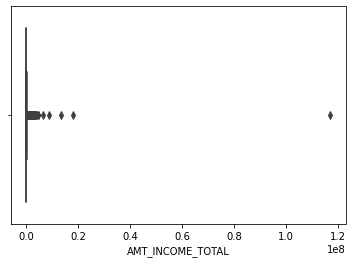

AMT_CREDIT  範圍 ：  45000.0 - 4050000.0


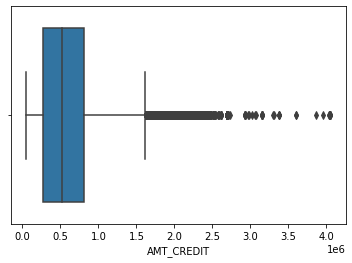

AMT_ANNUITY  範圍 ：  1615.5 - 258025.5


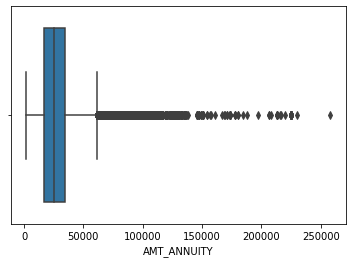

AMT_GOODS_PRICE  範圍 ：  40500.0 - 4050000.0


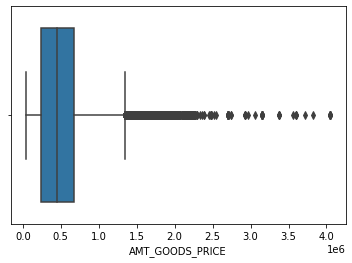

REGION_POPULATION_RELATIVE  範圍 ：  0.00029 - 0.072508


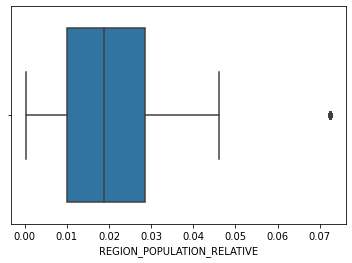

DAYS_REGISTRATION  範圍 ：  -24672.0 - 0.0


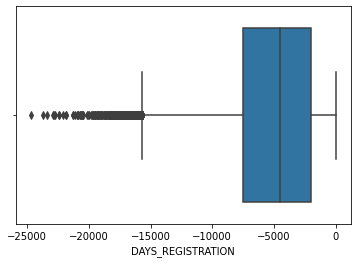

OWN_CAR_AGE  範圍 ：  0.0 - 91.0


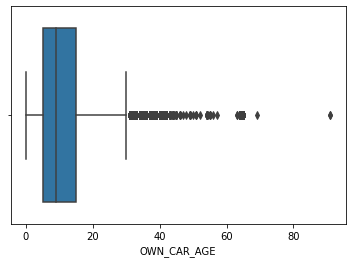

CNT_FAM_MEMBERS  範圍 ：  1.0 - 20.0


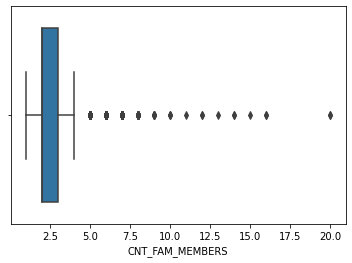

EXT_SOURCE_1  範圍 ：  0.0145681324124455 - 0.962692770561306


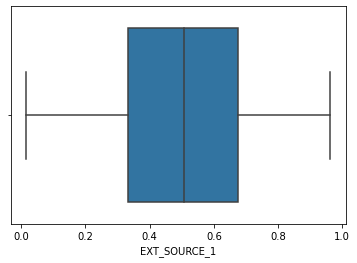

EXT_SOURCE_2  範圍 ：  8.173616518884397e-08 - 0.8549996664047012


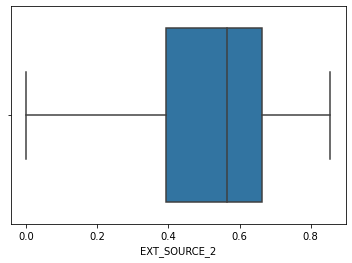

EXT_SOURCE_3  範圍 ：  0.0005272652387098 - 0.8960095494948396


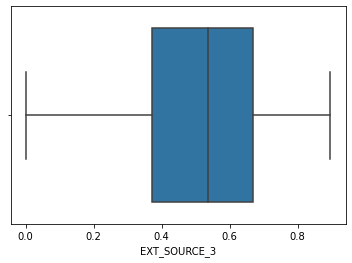

APARTMENTS_AVG  範圍 ：  0.0 - 1.0


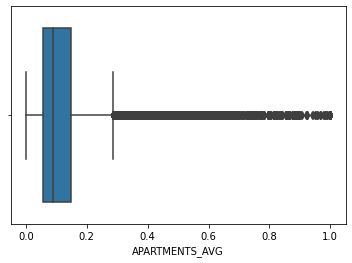

BASEMENTAREA_AVG  範圍 ：  0.0 - 1.0


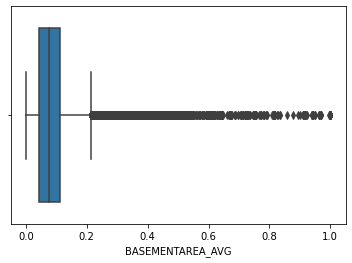

YEARS_BEGINEXPLUATATION_AVG  範圍 ：  0.0 - 1.0


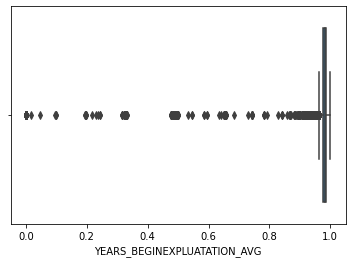

YEARS_BUILD_AVG  範圍 ：  0.0 - 1.0


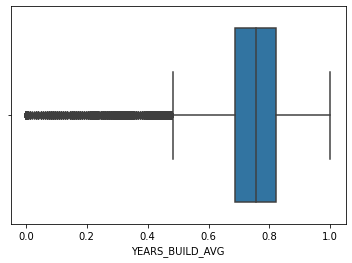

COMMONAREA_AVG  範圍 ：  0.0 - 1.0


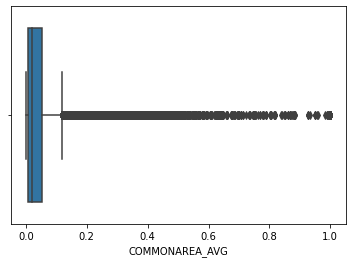

ELEVATORS_AVG  範圍 ：  0.0 - 1.0


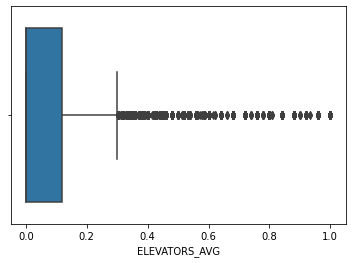

ENTRANCES_AVG  範圍 ：  0.0 - 1.0


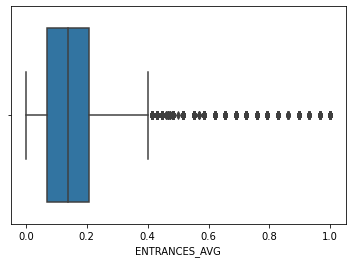

FLOORSMAX_AVG  範圍 ：  0.0 - 1.0


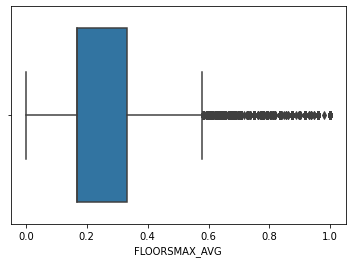

FLOORSMIN_AVG  範圍 ：  0.0 - 1.0


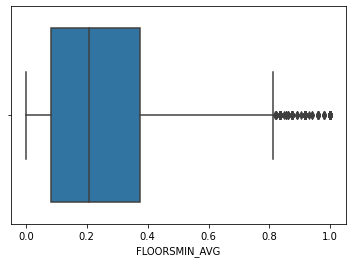

LANDAREA_AVG  範圍 ：  0.0 - 1.0


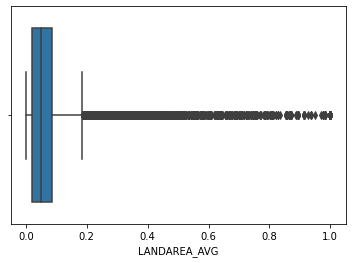

LIVINGAPARTMENTS_AVG  範圍 ：  0.0 - 1.0


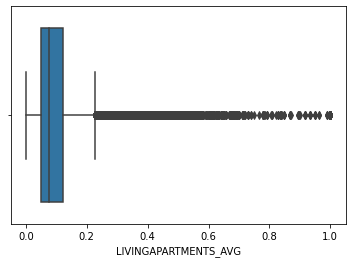

LIVINGAREA_AVG  範圍 ：  0.0 - 1.0


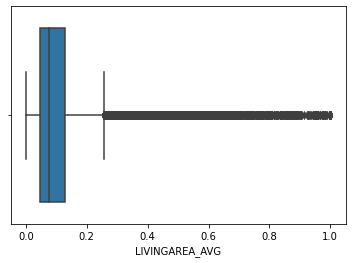

NONLIVINGAPARTMENTS_AVG  範圍 ：  0.0 - 1.0


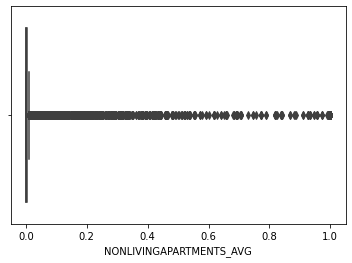

NONLIVINGAREA_AVG  範圍 ：  0.0 - 1.0


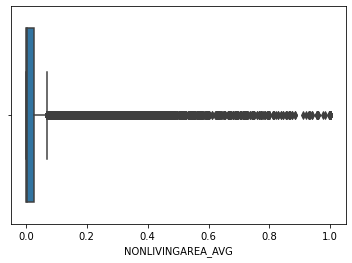

APARTMENTS_MODE  範圍 ：  0.0 - 1.0


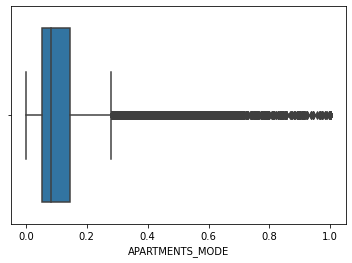

BASEMENTAREA_MODE  範圍 ：  0.0 - 1.0


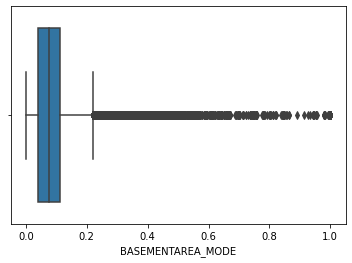

YEARS_BEGINEXPLUATATION_MODE  範圍 ：  0.0 - 1.0


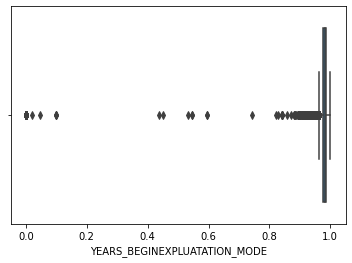

YEARS_BUILD_MODE  範圍 ：  0.0 - 1.0


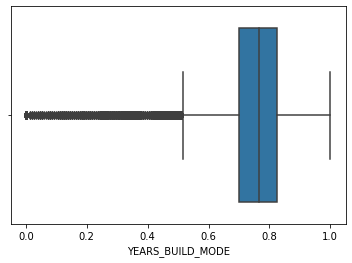

COMMONAREA_MODE  範圍 ：  0.0 - 1.0


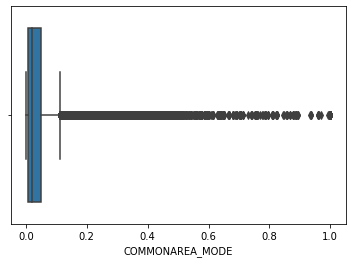

ELEVATORS_MODE  範圍 ：  0.0 - 1.0


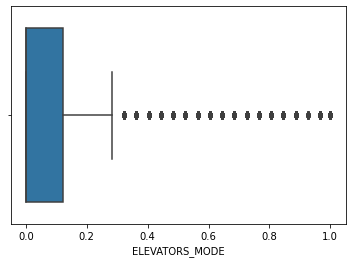

ENTRANCES_MODE  範圍 ：  0.0 - 1.0


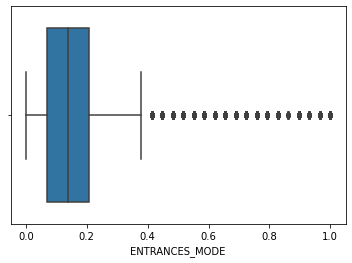

FLOORSMAX_MODE  範圍 ：  0.0 - 1.0


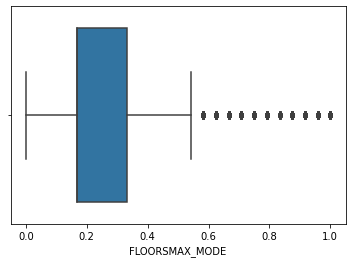

FLOORSMIN_MODE  範圍 ：  0.0 - 1.0


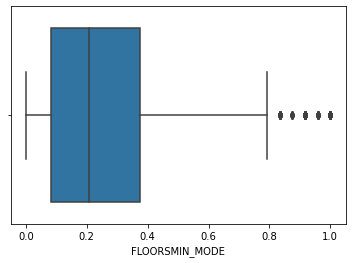

LANDAREA_MODE  範圍 ：  0.0 - 1.0


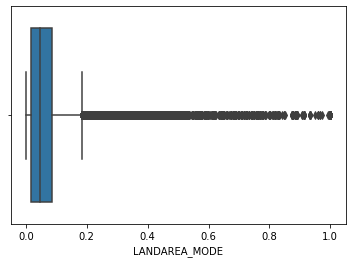

LIVINGAPARTMENTS_MODE  範圍 ：  0.0 - 1.0


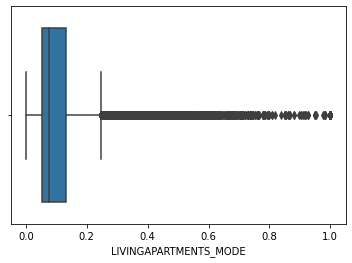

LIVINGAREA_MODE  範圍 ：  0.0 - 1.0


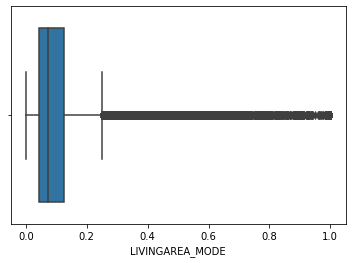

NONLIVINGAPARTMENTS_MODE  範圍 ：  0.0 - 1.0


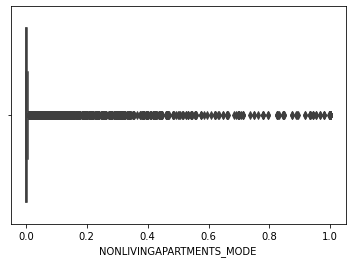

NONLIVINGAREA_MODE  範圍 ：  0.0 - 1.0


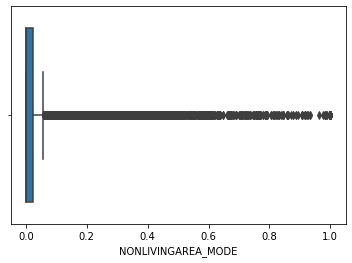

APARTMENTS_MEDI  範圍 ：  0.0 - 1.0


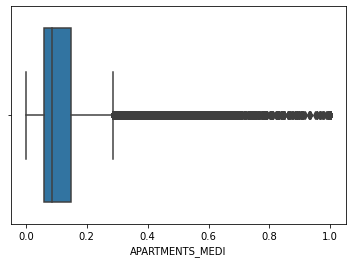

BASEMENTAREA_MEDI  範圍 ：  0.0 - 1.0


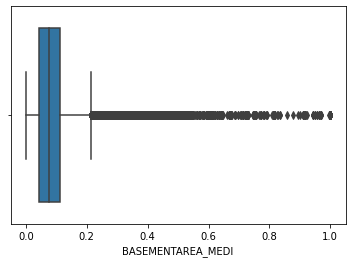

YEARS_BEGINEXPLUATATION_MEDI  範圍 ：  0.0 - 1.0


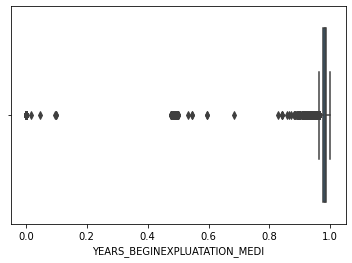

YEARS_BUILD_MEDI  範圍 ：  0.0 - 1.0


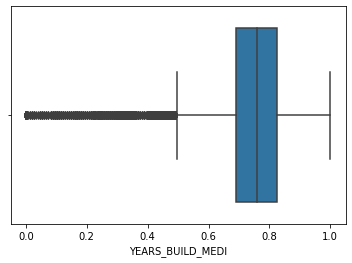

COMMONAREA_MEDI  範圍 ：  0.0 - 1.0


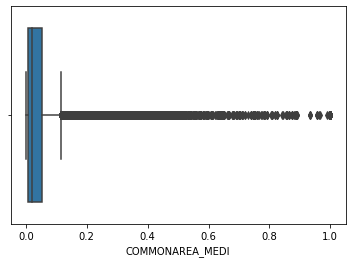

ELEVATORS_MEDI  範圍 ：  0.0 - 1.0


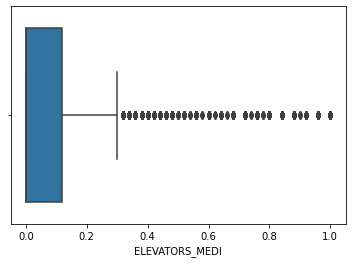

ENTRANCES_MEDI  範圍 ：  0.0 - 1.0


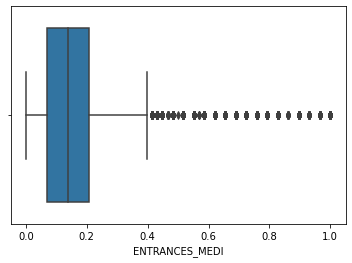

FLOORSMAX_MEDI  範圍 ：  0.0 - 1.0


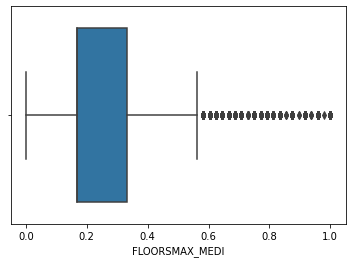

FLOORSMIN_MEDI  範圍 ：  0.0 - 1.0


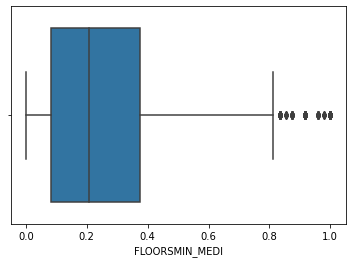

LANDAREA_MEDI  範圍 ：  0.0 - 1.0


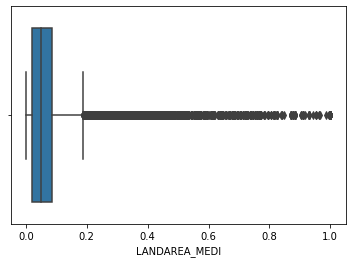

LIVINGAPARTMENTS_MEDI  範圍 ：  0.0 - 1.0


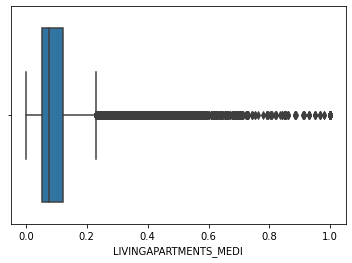

LIVINGAREA_MEDI  範圍 ：  0.0 - 1.0


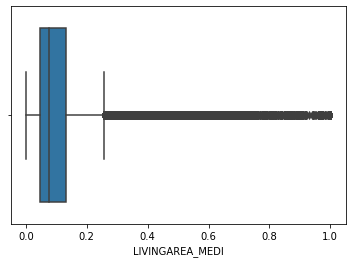

NONLIVINGAPARTMENTS_MEDI  範圍 ：  0.0 - 1.0


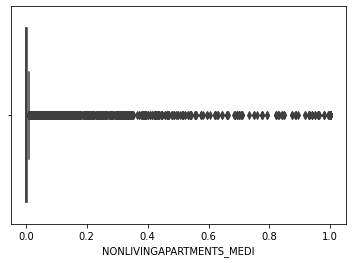

NONLIVINGAREA_MEDI  範圍 ：  0.0 - 1.0


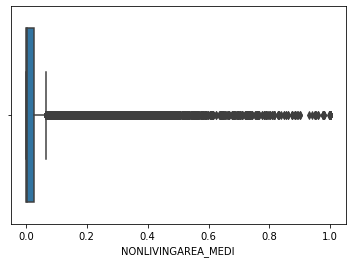

TOTALAREA_MODE  範圍 ：  0.0 - 1.0


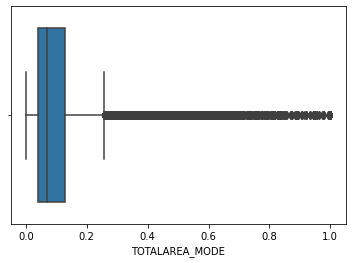

OBS_30_CNT_SOCIAL_CIRCLE  範圍 ：  0.0 - 348.0


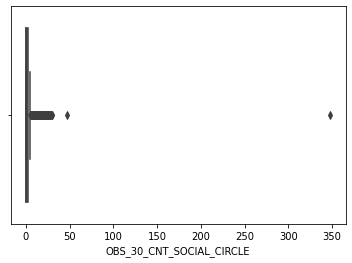

DEF_30_CNT_SOCIAL_CIRCLE  範圍 ：  0.0 - 34.0


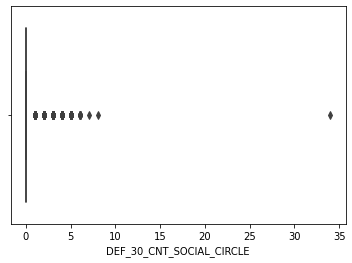

OBS_60_CNT_SOCIAL_CIRCLE  範圍 ：  0.0 - 344.0


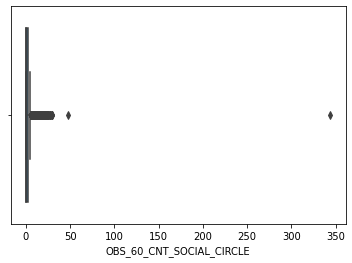

DEF_60_CNT_SOCIAL_CIRCLE  範圍 ：  0.0 - 24.0


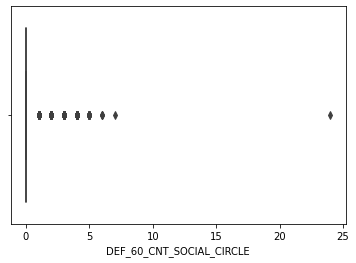

DAYS_LAST_PHONE_CHANGE  範圍 ：  -4292.0 - 0.0


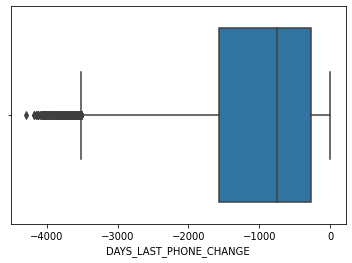

AMT_REQ_CREDIT_BUREAU_HOUR  範圍 ：  0.0 - 4.0


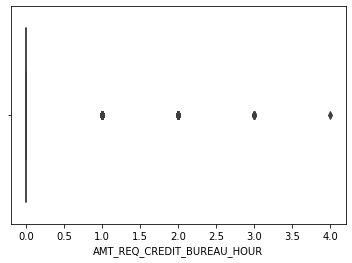

AMT_REQ_CREDIT_BUREAU_DAY  範圍 ：  0.0 - 9.0


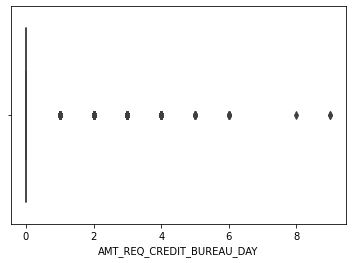

AMT_REQ_CREDIT_BUREAU_WEEK  範圍 ：  0.0 - 8.0


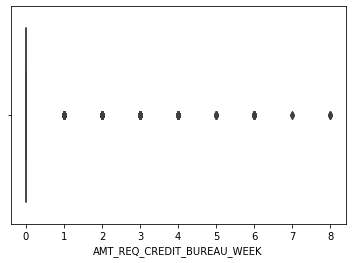

AMT_REQ_CREDIT_BUREAU_MON  範圍 ：  0.0 - 27.0


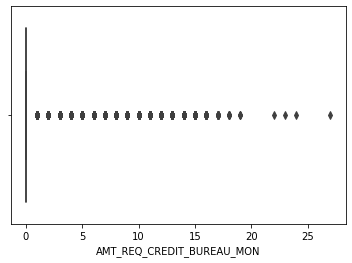

AMT_REQ_CREDIT_BUREAU_QRT  範圍 ：  0.0 - 261.0


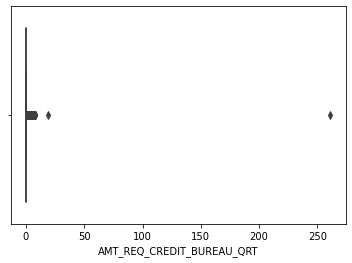

AMT_REQ_CREDIT_BUREAU_YEAR  範圍 ：  0.0 - 25.0


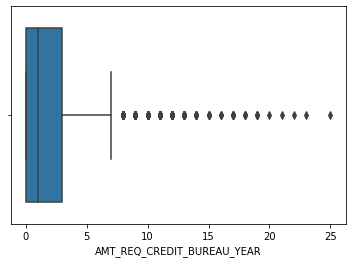

In [39]:
# 再把只有 2 值 (通常是 0,1) 的欄位去掉
numeric_columns = list(app_train[numeric_columns].columns[list(app_train[numeric_columns].apply(lambda x:len(x.unique())!=2 ))])
print("Numbers of remain columns: " ,len(numeric_columns))

# 檢視這些欄位的數值範圍
import seaborn as sns
for col in numeric_columns:
    print(col," 範圍 ： ",app_train[col].min(),"-",app_train[col].max())
    #app_train[[col]].boxplot(vert=False)
    sns.boxplot(x=app_train[col])
    plt.show()

In [30]:
from scipy import stats
outlier_col=[]
for col in numeric_columns:
    x=abs(stats.zscore(app_train[col]))
    for i in range (0,len(x)):
        if x[i]>3:
            if col not in outlier_col:
                outlier_col.append(col)
                    
print(outlier_col)

['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION']


In [34]:
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x)+1) / len(x)
    return (x,y)

### Hints: Emprical Cumulative Density Plot, [ECDF](https://zh.wikipedia.org/wiki/%E7%BB%8F%E9%AA%8C%E5%88%86%E5%B8%83%E5%87%BD%E6%95%B0), [ECDF with Python](https://stackoverflow.com/questions/14006520/ecdf-in-python-without-step-function)

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


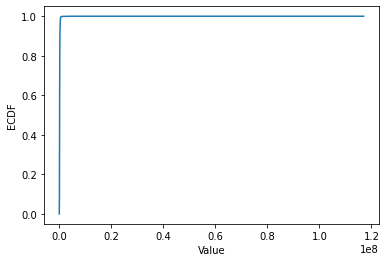

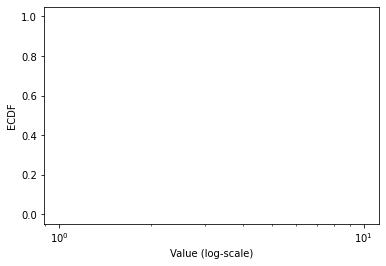

In [35]:
# 最大值離平均與中位數很遠
print(app_train['AMT_INCOME_TOTAL'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
YOUR CODE HERE

cdf = app_train['AMT_INCOME_TOTAL'].sort_values().reset_index(drop = True)
"""
x, y = ecdf(app_train['AMT_INCOME_TOTAL'])

plt.plot(x,y)
#plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
#plt.xlim([cdf.index.min(), cdf.index.max() * 1.05]) # 限制顯示圖片的範圍
#plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()

# 改變 y 軸的 Scale, 讓我們可以正常檢視 ECDF
x, y = ecdf(app_train['AMT_INCOME_TOTAL'])
plt.xscale('log')
plt.xlabel('Value (log-scale)')
plt.ylabel('ECDF')

plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()

## 補充：Normal dist 的 ECDF
![ecdf_normal](https://au.mathworks.com/help/examples/stats/win64/PlotEmpiricalCdfAndCompareWithSamplingDistributionExample_01.png)

count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


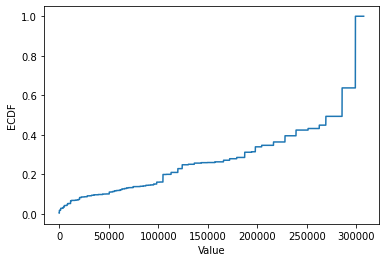

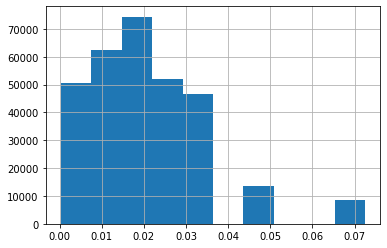

0.035792    16408
0.046220    13442
0.030755    12163
0.025164    11950
0.026392    11601
            ...  
0.001417      467
0.001333      235
0.000533       39
0.000938       28
0.000290        2
Name: REGION_POPULATION_RELATIVE, Length: 81, dtype: int64

In [16]:
# 最大值落在分布之外
print(app_train['REGION_POPULATION_RELATIVE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
Your Code Here
"""
cdf = app_train['REGION_POPULATION_RELATIVE'].sort_values().reset_index(drop = True)


plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()

app_train['REGION_POPULATION_RELATIVE'].hist()
plt.show()

app_train['REGION_POPULATION_RELATIVE'].value_counts()

# 就以這個欄位來說，雖然有資料掉在分布以外，也不算異常，僅代表這間公司在稍微熱鬧的地區有的據點較少，
# 導致 region population relative 在少的部分較為密集，但在大的部分較為疏漏

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


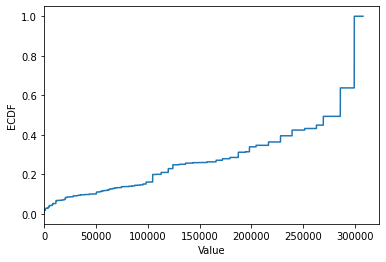

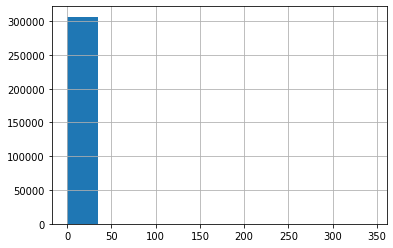

344.0         1
47.0          1
30.0          1
29.0          2
28.0          1
27.0          5
26.0          1
25.0         11
24.0         12
23.0         13
22.0         20
21.0         28
20.0         30
19.0         44
18.0         49
17.0         73
16.0        137
15.0        166
14.0        238
13.0        401
12.0        620
11.0        837
10.0       1335
9.0        1959
8.0        2886
7.0        4344
6.0        6349
5.0        9463
4.0       13946
3.0       20215
2.0       29766
1.0       48870
0.0      164666
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64


In [17]:
# 最大值落在分布之外
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)


cdf = app_train['REGION_POPULATION_RELATIVE'].sort_values().reset_index(drop = True)


plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([cdf.index.min() * 0.95, cdf.index.max() * 1.05])
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()

app_train['OBS_60_CNT_SOCIAL_CIRCLE'].hist()
plt.show()
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts().sort_index(ascending = False))

## 注意：當 histogram 畫出上面這種圖 (只出現一條，但是 x 軸延伸很長導致右邊有一大片空白時，代表右邊有值但是數量稀少。這時可以考慮用 value_counts 去找到這些數值

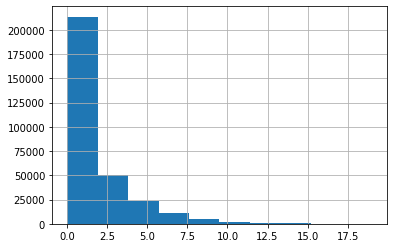

In [18]:
# 把一些極端值暫時去掉，在繪製一次 Histogram
# 選擇 OBS_60_CNT_SOCIAL_CIRCLE 小於 20 的資料點繪製
"""
Your Code Here
"""
loc_a = app_train['OBS_60_CNT_SOCIAL_CIRCLE'] < 20
loc_b = 'OBS_60_CNT_SOCIAL_CIRCLE'

app_train.loc[loc_a, loc_b].hist()
plt.show()